# Homework 9: Classification

# Aliza Rafique (ar05986)

### ar05986@st.habib.edu.pk

## Necessary Imports

In [421]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [422]:
df = pd.read_csv('CreditCardData.csv')
# Q4: seed setting
seed = 5
df

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


## Q1: Cleaning the data

In [423]:
# Will drop the question mark ones after encoding.
df = df.dropna(axis=0,how='any')
df

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


In [424]:
for i in list(df.columns):
    df = df[df[i] != '?']
df

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


## Q2: Approved Column

In [425]:
df.loc[df['Approved']=='+', 'Approved'] = 'Yes'
df.loc[df['Approved']=='-', 'Approved'] = 'No'
df

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,Yes
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,Yes
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,Yes
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,Yes
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,No
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,No
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,No
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,No


### One-hot encoding

In [426]:
df.columns

Index(['Male', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [427]:
df2 = pd.get_dummies(df, columns=['Male', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity',
                               'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ZipCode'])
df2

,Age,Debt,YearsEmployed,CreditScore,Income,Approved,Male_a,Male_b,Married_l,Married_u,...,ZipCode_80,ZipCode_840,ZipCode_86,ZipCode_88,ZipCode_92,ZipCode_93,ZipCode_94,ZipCode_96,ZipCode_980,ZipCode_99
0,30.83,0.000,1.25,1,0,Yes,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,58.67,4.460,3.04,6,560,Yes,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,24.5,0.500,1.50,0,824,Yes,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,27.83,1.540,3.75,5,3,Yes,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,20.17,5.625,1.71,0,0,Yes,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,0,No,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
686,22.67,0.750,2.00,2,394,No,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
687,25.25,13.500,2.00,1,1,No,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
688,17.92,0.205,0.04,0,750,No,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


## Q3 and Q4 done in the following sections

## Q5: Predicting Approved Feature with Decision Tree Model

In [428]:
X1 = df2.drop(['Approved'], axis=1)
Y1 = df2['Approved']

### Distributing into train and test set

In [429]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.3, random_state=seed)

### Decision Tree Model
The decision tree model that we are using uses entropy. 

In [430]:
dt = tree.DecisionTreeClassifier(random_state=seed)

dtmodel = dt.fit(X_train1, y_train1)

train_pred1 = dtmodel.predict(X_train1)

In [431]:
acc = accuracy_score(train_pred1, y_train1)
acc*100

100.0

In [432]:
test_pred1 = dtmodel.predict(X_test1)

In [433]:
acc = accuracy_score(test_pred1, y_test1)
acc*100

81.63265306122449

In [434]:
print(classification_report(y_test1, test_pred1))

              precision    recall  f1-score   support

          No       0.81      0.86      0.84       107
         Yes       0.82      0.76      0.79        89

    accuracy                           0.82       196
   macro avg       0.82      0.81      0.81       196
weighted avg       0.82      0.82      0.82       196



#### We have 100% accuracy while training the model to predict the approved value. And with 82% accuracy, we predicted the value of approved column with unseen data. So, the testing accuracy is greater than the training accuracy, which is good. Using other measures to further interpret.
Since, the training accuracy is 100% it means that we are overfitting. And that happens because up till now, the tree is allowed to fully grown till the leaves that might include features not as significant. To check that, we will print the tree to see if it is complex enough.

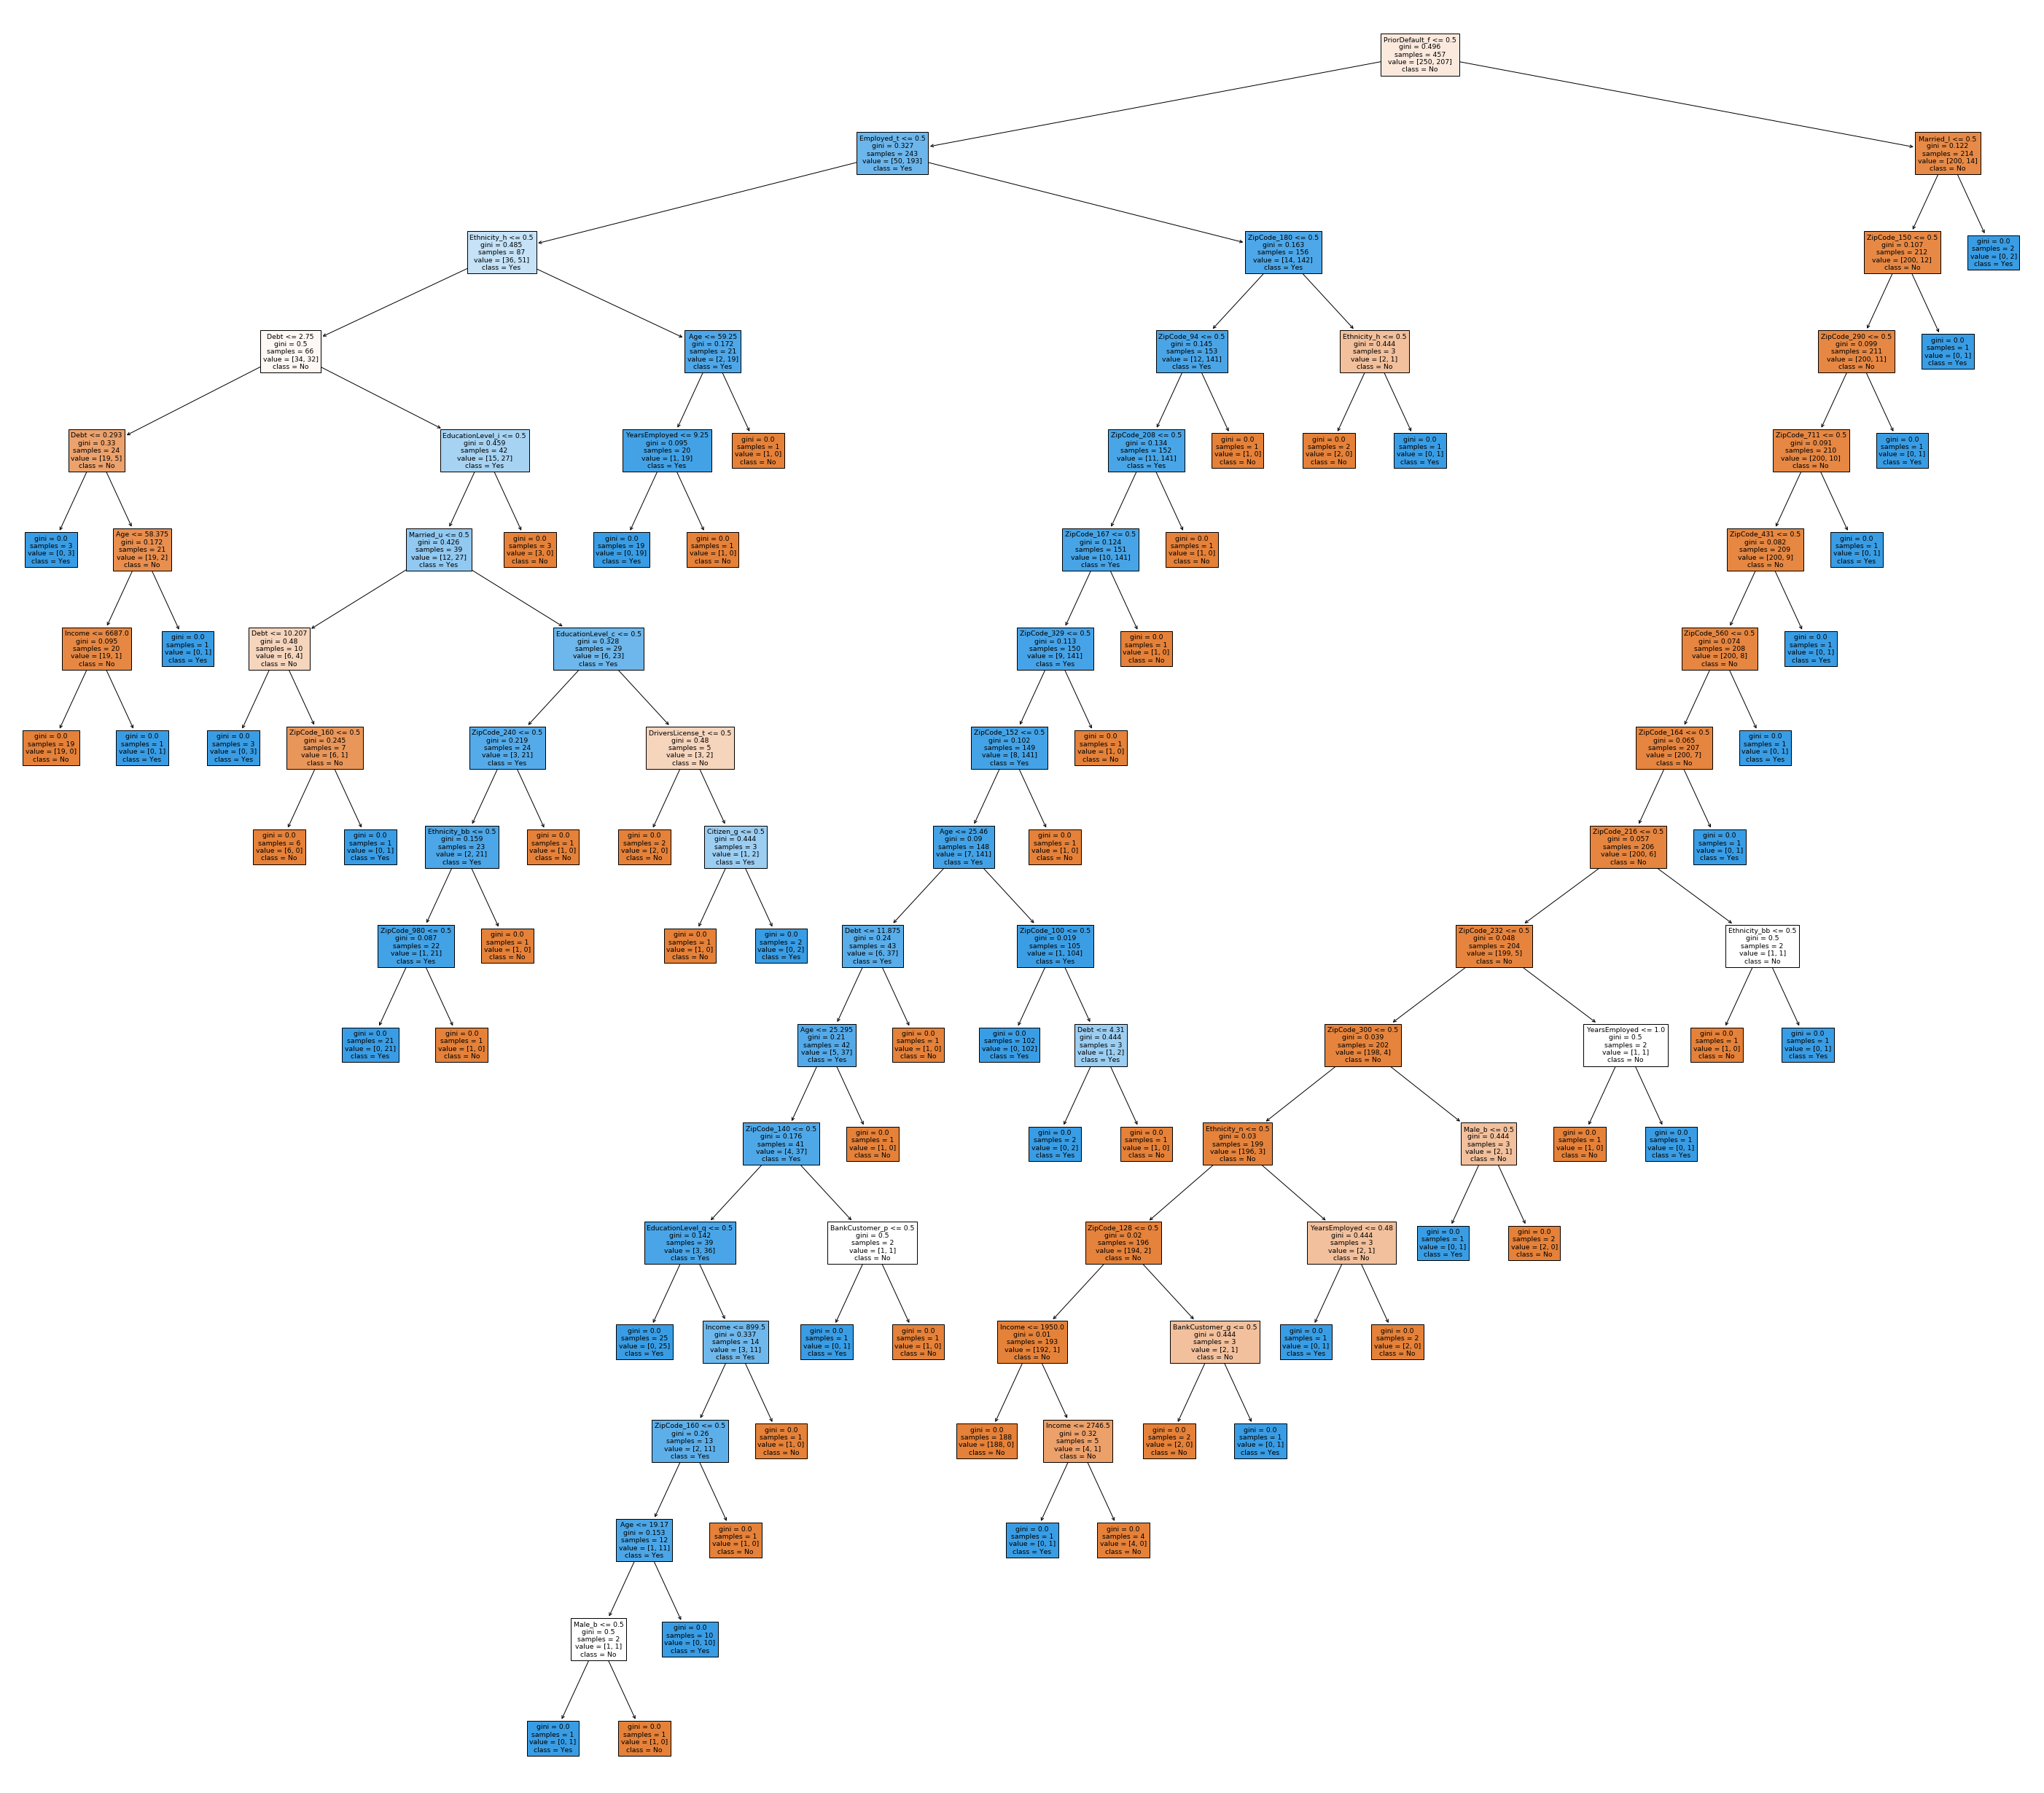

In [435]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel, 
                   feature_names=list(X1.columns),  
                   class_names=Y1.value_counts().index,
                   filled=True)

In [266]:
fig.savefig("decistion_treeQ5.png")

#### In this decision tree, we can see that the very first feature that is mentioned is PriorDefault which means it is the most important feature in predicting the value for approved column. Least significant features include Age, Education level etc. 
Now, we will prune the model (removing any unnecessary branches) and then test the accuracy to try to reduce any overfitting. I will be using criterian as gini now, it doesn't really affect much even if I continue to use it with entropy.

### Pruning the model

c:\users\haroon\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\haroon\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\haroon\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


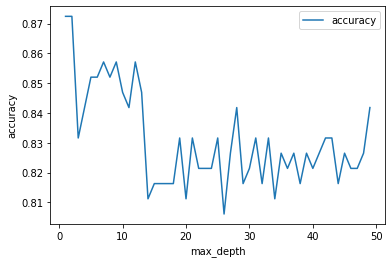

In [436]:
max_depth = []
acc = []
for i in range(1,50):
    dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(X_train1, y_train1)
    pred = dtree.predict(X_test1)
    acc.append(accuracy_score(y_test1, pred))
    max_depth.append(i)
    
d = pd.DataFrame({'accuracy':pd.Series(acc),'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','accuracy', data=d)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

#### Now, here we can see that for each depth if we have a different value of accuracy. With pruning, we are making the tree less complex and thus creating a better model. 

In [437]:
dt = tree.DecisionTreeClassifier(criterion='gini',max_depth=6)

In [438]:
dtmodel = dt.fit(X_train1, y_train1)
train_pred1 = dtmodel.predict(X_train1)

acc = accuracy_score(train_pred1, y_train1)
acc*100

93.8730853391685

In [440]:
test_pred1 = dtmodel.predict(X_test1)
acc = accuracy_score(test_pred1, y_test1)
acc*100

85.20408163265306

In [441]:
print(classification_report(y_test1, test_pred1))

              precision    recall  f1-score   support

          No       0.87      0.86      0.86       107
         Yes       0.83      0.84      0.84        89

    accuracy                           0.85       196
   macro avg       0.85      0.85      0.85       196
weighted avg       0.85      0.85      0.85       196



In [400]:
scores = cross_val_score(dtmodel, X1, Y1, cv=5)
scores.mean()

0.836124486200822

#### Here, we can see that the accuracy of the test data increases by 3% due to pruning and we also reduced overfitting because the accuracy of training data is 93.8%. It helps increasing the accuracy because we remove insignificant features. The overall accuracy of the model is 83%.

## Q6: Prediction Approved Feature with Random Forest Model

In [445]:
X = df2.drop(['Approved'], axis=1)
Y = df2['Approved']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

### Random Forest Model
Will create the graphs for only the last one because the prominent features do not really change.

#### 1. n_estimators = 10

In [448]:
rf = RandomForestClassifier(n_estimators=10)

In [449]:
rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

98.90590809628009

In [450]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

82.6530612244898

In [451]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

          No       0.82      0.88      0.85       107
         Yes       0.84      0.76      0.80        89

    accuracy                           0.83       196
   macro avg       0.83      0.82      0.82       196
weighted avg       0.83      0.83      0.83       196



#### Accuracy

In [452]:
scores = cross_val_score(rfmodel, X, Y, cv=5)
scores.mean()

0.8361597181444509

#### Explanation:
The training accuracy with 10 estimators is 98.9%, greater than the testing accuracy of 83%. The overall accuracy of the model in predicting the classes on average is 83.6%.

#### 2. n_estimators = 50

In [453]:
rf = RandomForestClassifier(n_estimators=50)

In [454]:
rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [455]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

85.20408163265306

In [456]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

          No       0.87      0.86      0.86       107
         Yes       0.83      0.84      0.84        89

    accuracy                           0.85       196
   macro avg       0.85      0.85      0.85       196
weighted avg       0.85      0.85      0.85       196



#### Accuracy

In [457]:
scores = cross_val_score(rfmodel, X, Y, cv=5)
scores.mean()

0.8453200234879624

#### Explanation:
With more estimators, the accuracy of training data and testing data, both increased. Now, we have the accuracy of training data as 100% and of testing data it is 85%. The overall average accuracy of the model is 84%.

#### 3. n_estimators = 80

In [458]:
rf = RandomForestClassifier(n_estimators=80)

In [459]:
rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [460]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

86.22448979591837

In [461]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

          No       0.88      0.87      0.87       107
         Yes       0.84      0.85      0.85        89

    accuracy                           0.86       196
   macro avg       0.86      0.86      0.86       196
weighted avg       0.86      0.86      0.86       196



#### Accuracy

In [462]:
scores = cross_val_score(rfmodel, X, Y, cv=5)
scores.mean()

0.8437580739870816

#### Explanation:
With more estimators, the accuracy of testing data, increased. Now, we have the accuracy of training data as 100% and of testing data it is 86%. The overall average accuracy of the model is 84%.

#### 4. n_estimators = 100

In [463]:
rf = RandomForestClassifier(n_estimators=100)

In [464]:
rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [465]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

85.71428571428571

In [466]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

          No       0.89      0.84      0.87       107
         Yes       0.82      0.88      0.85        89

    accuracy                           0.86       196
   macro avg       0.86      0.86      0.86       196
weighted avg       0.86      0.86      0.86       196



#### Accuracy

In [467]:
scores = cross_val_score(rfmodel, X, Y, cv=5)
scores.mean()

0.8575455079271872

#### Explanation:
There is no increase in the accuracy for testing data for this estimator value. That happens because the model is a random forest and the number of increase of trees (estimators) is on 20. But the model accuracy increased to 85.5%.

#### 5. n_estimators = 150

In [481]:
rf = RandomForestClassifier(n_estimators=150)

In [482]:
rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [483]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

86.73469387755102

In [484]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

          No       0.89      0.87      0.88       107
         Yes       0.85      0.87      0.86        89

    accuracy                           0.87       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.87      0.87      0.87       196



 #### Accuracy

In [485]:
scores = cross_val_score(rfmodel, X, Y, cv=5)
scores.mean()

0.8529418672930124

#### Explanation
With this final estimator value, we can see that for most estimator values, the average testing accuracy is 87% with 100% as the training accuracy. This model is also about 85% accurate. Out of all the other estimator values, this one can be considered as the best.

### Further Analysis
In this section, I will base my analysis on the model with estimator value of 150. 

c:\users\haroon\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


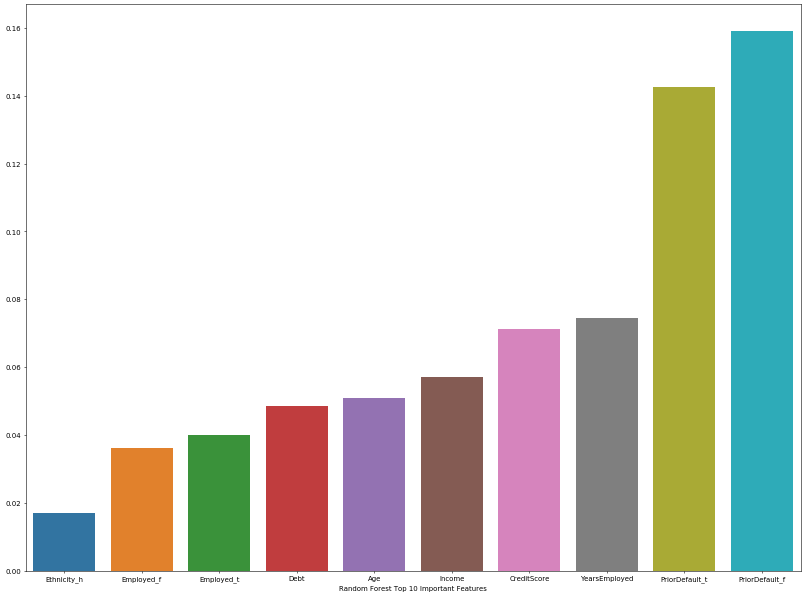

In [486]:
#plt.barh(list(X.columns), rf.feature_importances_)
sorted_idx = rfmodel.feature_importances_.argsort()[-10:]
plt.figure(num=None, figsize=(20,15), dpi=50, facecolor='w', edgecolor='r')
sns.barplot(list(X.columns[sorted_idx]), rfmodel.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Top 10 Important Features")
plt.show()

#### From this figure, we can observe that the top 10 features are Prior Default types, employment years, income and others. Prior default was also the most prominent feature for decision tree model. Interestingly, here age also lies as one of the important features.

c:\users\haroon\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


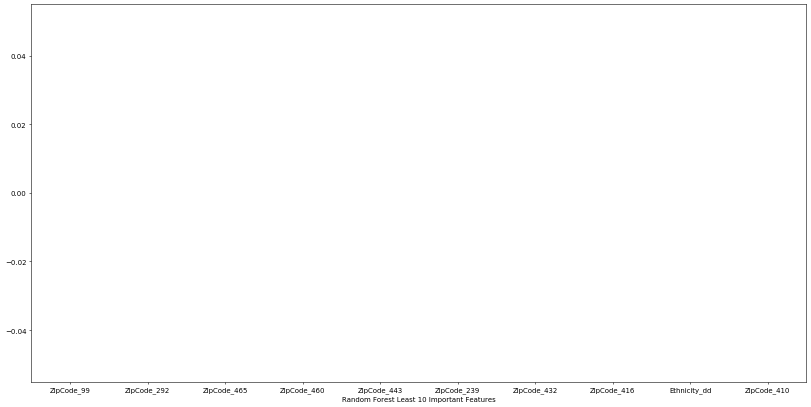

In [487]:
sorted_idx = rfmodel.feature_importances_.argsort()[:10]
plt.figure(num=None, figsize=(20,10), dpi=50, facecolor='w', edgecolor='r')
sns.barplot(list(X.columns[sorted_idx]), rfmodel.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Least 10 Important Features")
plt.show()

#### We can see that zip code feature is the least signifcant, it doesn't at all contribute to the prediction of approved feature.

## Q7: Comparison

### Accuracy

#### Decision Tree

In [488]:
scores = cross_val_score(dtmodel, X1, Y1, cv=5)
scores.mean()

0.8330710510863183

#### Random Forest Tree

In [489]:
scores = cross_val_score(rfmodel, X, Y, cv=5)
scores.mean()

0.8514503816793892

We can see that the overall average accuracy of random forest tree is better than the accuracy of decision tree. Moreover, from the prediction accuracy calculated above for both, we had a testing accuracy of decision tree model as 85% after pruning and the testing accuracy of random forest model is 87% which is a 2% increase. Till now, random forest tree model proves to be a better model. 

### Confusion Matrix

#### Decision Tree Model

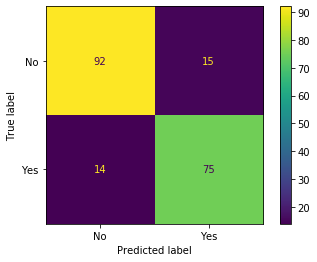

In [490]:
cm1 = confusion_matrix(y_test1,test_pred1)
cp = ConfusionMatrixDisplay(cm1,display_labels=rfmodel.classes_)
cp.plot()

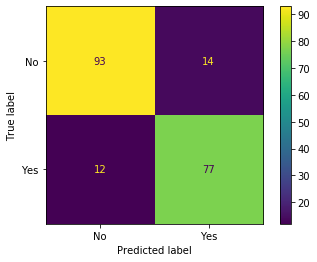

In [491]:
cm2 = confusion_matrix(y_test,test_pred)
cp = ConfusionMatrixDisplay(cm2,display_labels=rfmodel.classes_)
cp.plot()

From these matrices, we can deduce that the overall correct predicted values are greater for the random decision tree model as compared to that of decision tree model. Through both measures, we can conclude that the random decision tree model is better than the decision tree model.

## Q8: Food Recommendation

In [492]:
df = pd.read_csv('mcdonalds.csv')
df

,restaurant,item,calories,cal_fat,total_fat,sat_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,95,1110,44,3,11,37,4,20,20
1,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,155,1940,62,2,18,55,6,25,20
2,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,120,1980,81,4,18,46,6,20,20
3,Mcdonalds,Big Mac,540,250,28,10.0,80,950,46,3,9,25,10,2,15
4,Mcdonalds,Cheeseburger,300,100,12,5.0,40,680,33,2,7,15,10,2,10
5,Mcdonalds,Classic Chicken Sandwich,510,210,24,4.0,65,1040,49,3,6,25,0,4,2
6,Mcdonalds,Filet-O-Fish,380,170,18,4.0,40,640,38,2,5,15,2,0,15
7,Mcdonalds,Hamburger,250,70,8,3.0,30,480,31,2,6,13,2,2,4
8,Mcdonalds,Lobster Roll,290,50,5,1.5,65,630,35,2,3,24,4,6,15
9,Mcdonalds,McChicken,350,130,15,3.5,40,600,40,2,5,15,2,2,4


In [415]:
X = df.drop(['restaurant', 'item'], axis=1)
Y = df['item']

In [416]:
dt2 = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=1,random_state=seed)

In [417]:
dtmodel2 = dt2.fit(X, Y)

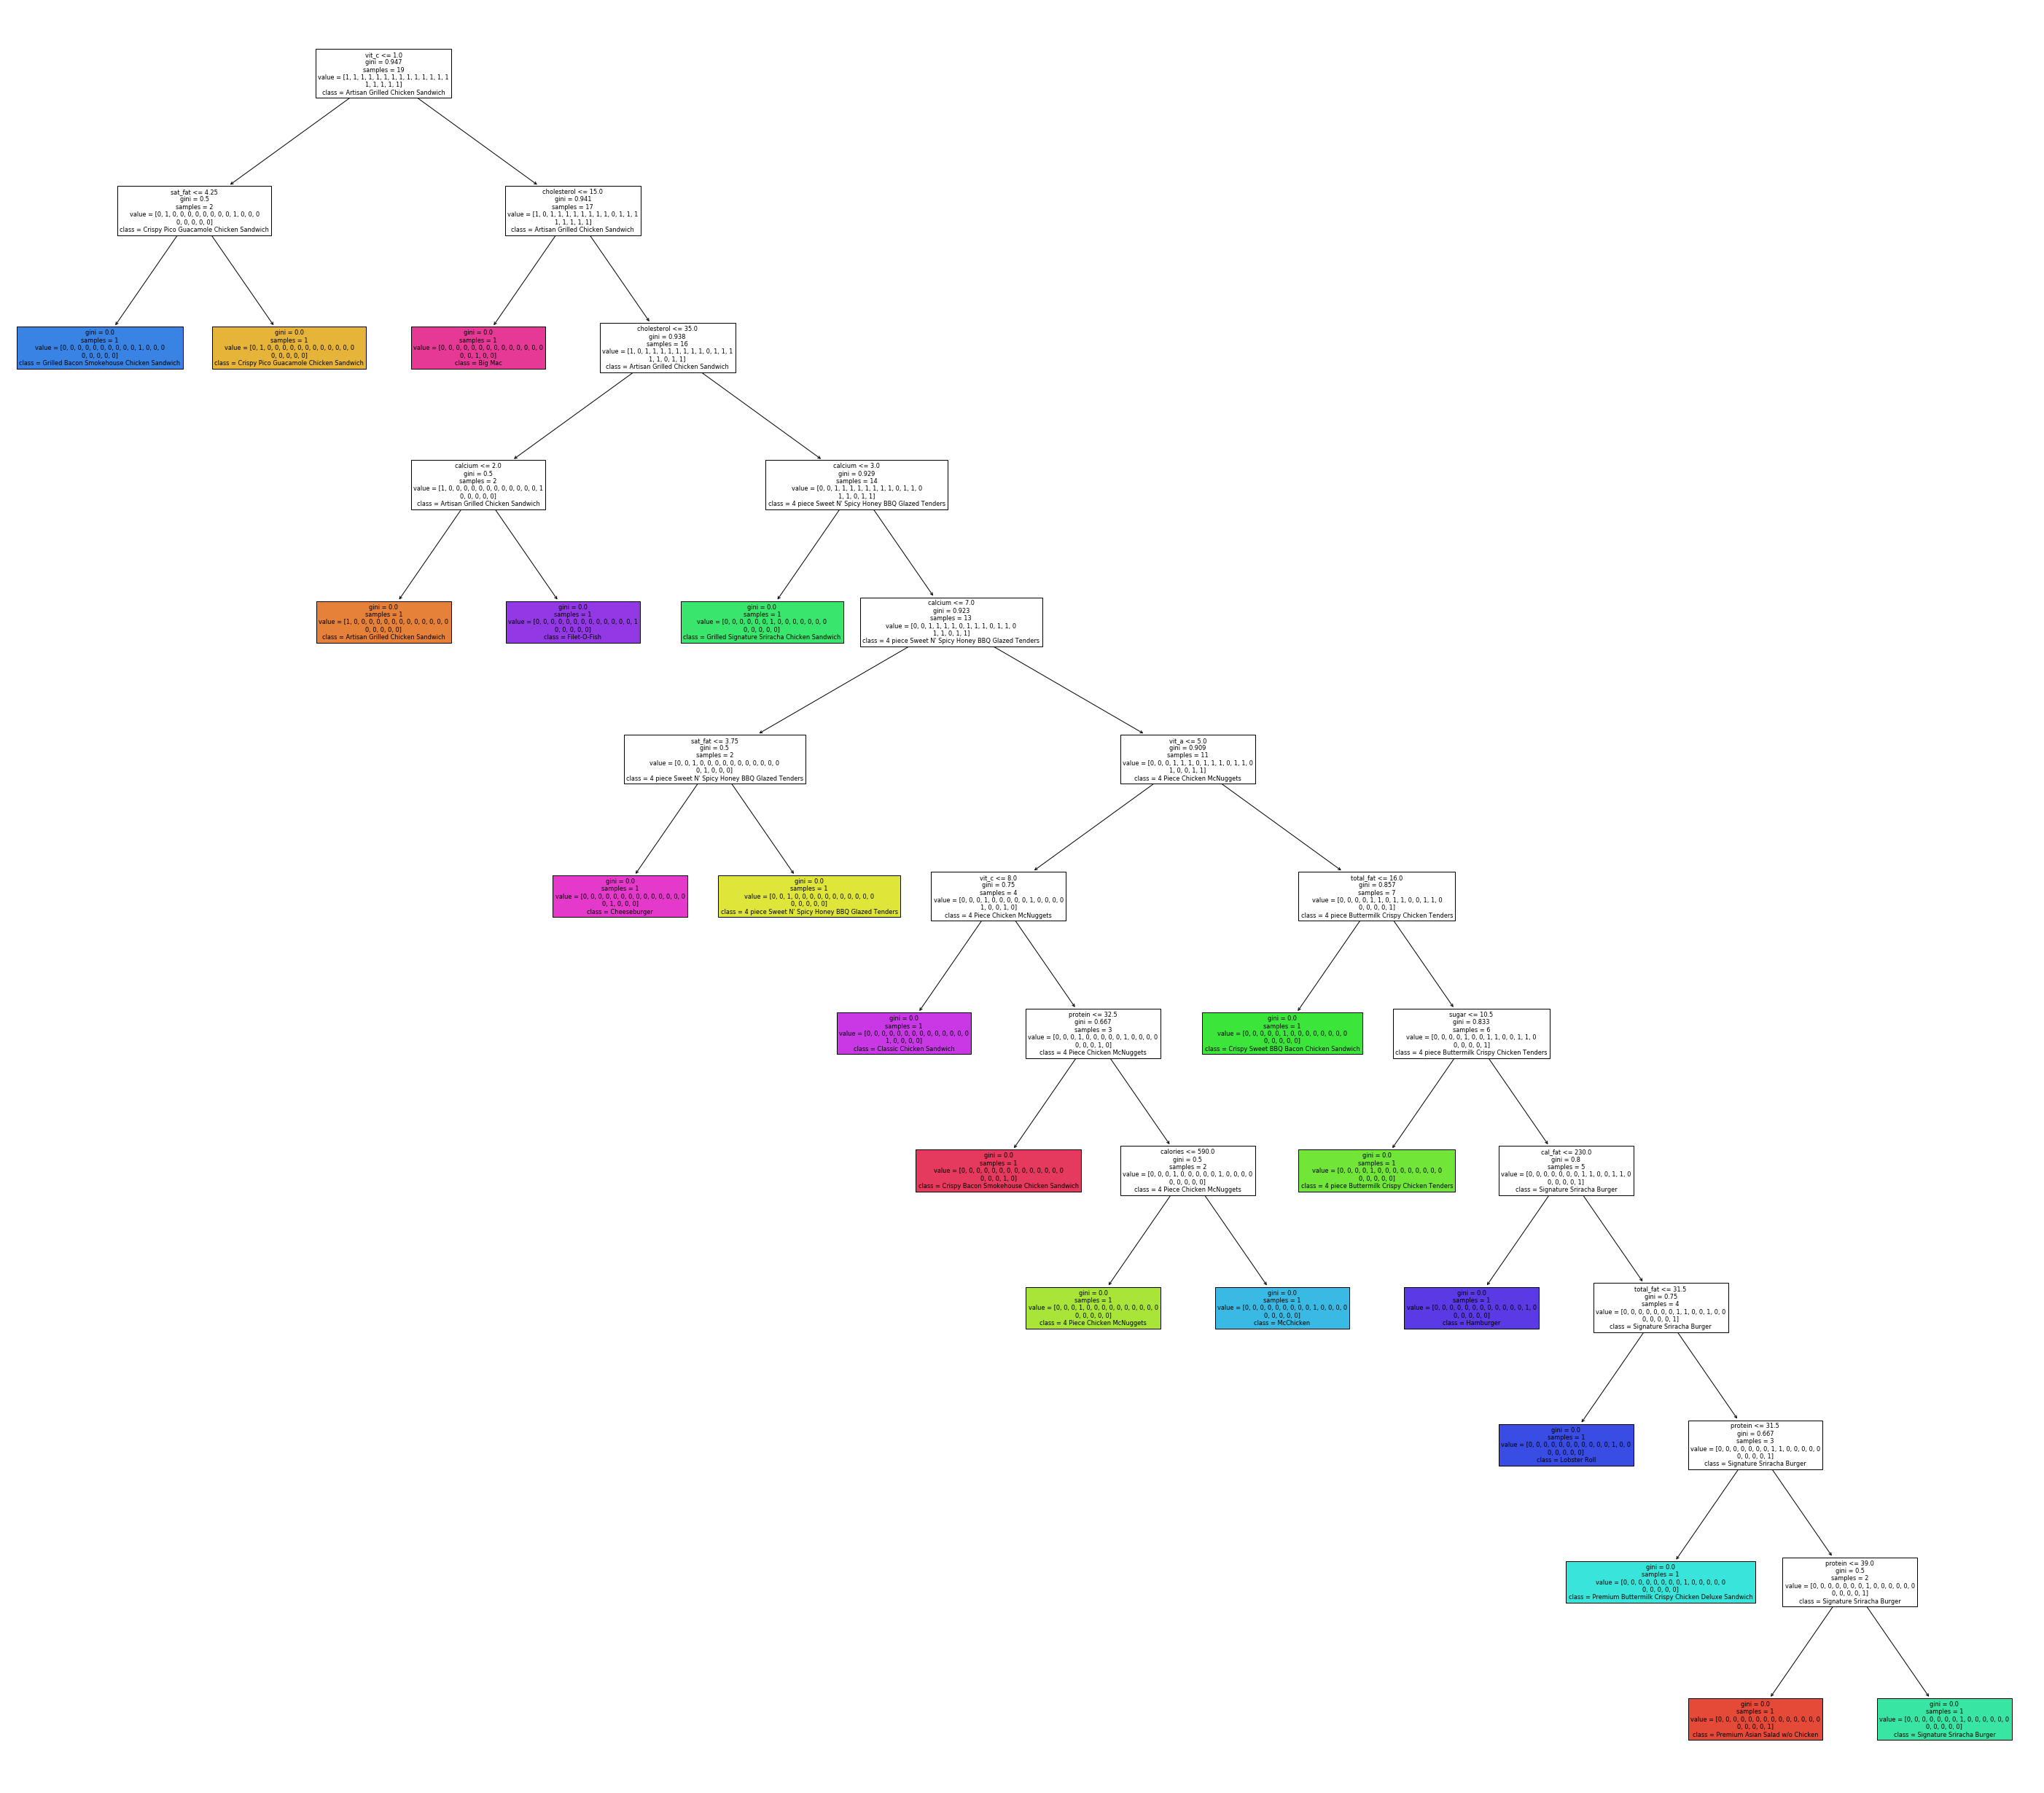

In [419]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel2, 
                   feature_names=list(X.columns),  
                   class_names=Y.value_counts().index,
                   filled=True)

In [420]:
fig.savefig("decistion_tree2.png")

### Interpretation
Vitamin C is the most significant feature to consider when determining the food items. The least of the significant features are protein and total fat. Let's compare Grilled Bacon Smokehouse Chicken Sandwich (GBSCS - the name is too long), Crispy Pico Guacamoli Chicken Sandwich (PGCS), and BigMac. GBSCS and PGCS are a lot more similar to each other than the BigMac. Both of them have vitamin C less than 1 as opposed to that of BigMac. However, GBSCS has saturated fats less than 4.25 and PGCS has greater than 4.25. The cholestrol level is not a prediction feature for GBSCS and PGCS. However, for BigMac, the cholestrol level is less than 15. Out of these three food items, if you are looking for a healthy option to eat (because we can't quantize taste for this part) then BigMac would be the best choice. It has low cholestrol and also it has more vitamin C as compared to the others. 

# End Of Assignment